In [1]:
import matplotlib as mpl
mpl.use('agg')
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.integrate as integrate

In [2]:
%matplotlib inline

In [3]:
def planar_SHO_cart(state,t,m,k):
    x      = state[0]
    vx     = state[1]
    y      = state[2]
    vy     = state[3]
    w0_sqr = k/m
    return np.array([vx,-w0_sqr*x,vy,-w0_sqr*y])    

In [4]:
def planar_SHO_polar(state,t,m,k):
    r         = state[0]
    r_dot     = state[1]
    theta     = state[2]
    theta_dot = state[3]
    w0_sqr    = k/m
    return np.array([r_dot,-w0_sqr*r+r*theta_dot**2,theta_dot,-2*r_dot*theta_dot/r])

In [5]:
def E_and_L_cart(eph,m,k):
    num_points = len(eph)
    conserved  = np.zeros((num_points,2))
    
    index = 0
    for record in eph:
        x  = record[0]
        vx = record[1]
        y  = record[2]
        vy = record[3]
        T  = 0.5*m*(vx**2 + vy**2)
        V  = 0.5*k*(x**2 + y**2)
        
        conserved[index,0] = T + V
        conserved[index,1] = (x*vy-y*vx)
        index              = index + 1
        
    return conserved    

In [6]:
def E_and_L_polar(eph,m,k):
    num_points = len(eph)
    conserved  = np.zeros((num_points,2))
    
    index = 0
    for record in eph:
        r                  = record[0]
        r_dot              = record[1]
        theta              = record[2]
        theta_dot          = record[3]
        T                  = 0.5*m*(r_dot**2 + r**2*theta_dot**2)
        V                  = 0.5*k*r**2
        conserved[index,0] = T + V
        conserved[index,1] = m*r**2*theta_dot
        index              = index + 1
        
    return conserved

In [7]:
m     = 1.0
k     = 2.0
parms = {'k':k,'m':m}

In [8]:
R        = 1.0
Omega    = 2.0
S0_cart  = np.array([R,0.0,0.0,R*Omega])
S0_polar = np.array([R,0.0,0.0,Omega])

In [9]:
time_span = np.arange(0.0,10.0,0.1)

In [10]:
eph_cart  = integrate.odeint(planar_SHO_cart, S0_cart, time_span,args=(m,k))
eph_polar = integrate.odeint(planar_SHO_polar,S0_polar,time_span,args=(m,k))

In [11]:
conserved_cart  = E_and_L_cart(eph_cart, m,k)
conserved_polar = E_and_L_polar(eph_polar,m,k)

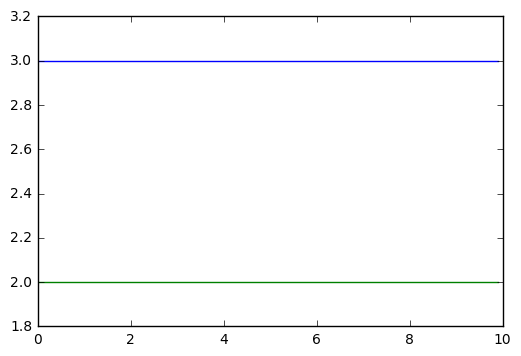

In [12]:
plt.plot(time_span,conserved_cart)

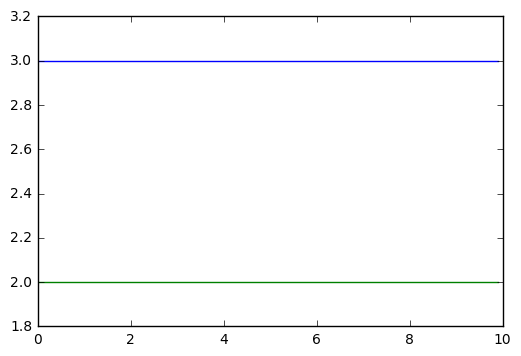

In [13]:
plt.plot(time_span,conserved_polar)